## Activity 5 - Classifying Flowers with CNN
Dataset-https://www.kaggle.com/alxmamaev/flowers-recognition

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

In this activity, we will learn:<br>
*	Custom Dataset - flowers
*	Load and preprocess the dataset
*	Split the dataset for training and testing
*	Define, compile and train a CNN model
*	Evaluate the model

### Mount Google Drive

Mount your Google Drive on your runtime using an authorization code.  

Follow the instruction on the screen to authorise Colab accessing your drive.  On your Google Drive, you can access you files prepend with “/content/drive/MyDrive/”


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries and dataset

**Flowers Dataset**<br>


In [ ]:
import cv2
import numpy as np
import random
import os
from imutils import paths
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers

# initialize the data and labels
data = []
labels = []

dataset_path = "/content/drive/MyDrive/DATASETS/flowers5_mini" # path to your dataset on google drive
IMAGE_DIMS = (224, 224, 3) # set up the dimension of your image

### Pre-process dataset

Read and format our images and labels into numpy array.  We will also rescale the image to 224 by 244 (this is the dimension used for the activity, so we just want to be consistent to make comparison).  We will also normalize the pixel value to [0,1].  This process will take awhile on colab.


In [ ]:
# time its performance
%%time

# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images(dataset_path)))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for ind, imagePath in enumerate(imagePaths):
	# load the image, pre-process it, and store it in the data list
	print("%d\t%s\tLABEL %s"%(ind, imagePath, imagePath.split(os.path.sep)[-2]))
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {:.2f}MB".format(data.nbytes / (1024 * 1000.0)))

[INFO] loading images...
0	/content/drive/MyDrive/DATASETS/flowers5_mini/dandelion/478851599_25bfd70605_n.jpg	LABEL dandelion
1	/content/drive/MyDrive/DATASETS/flowers5_mini/sunflower/40410963_3ac280f23a_n.jpg	LABEL sunflower
2	/content/drive/MyDrive/DATASETS/flowers5_mini/daisy/2019064575_7656b9340f_m.jpg	LABEL daisy
3	/content/drive/MyDrive/DATASETS/flowers5_mini/dandelion/458011386_ec89115a19.jpg	LABEL dandelion
4	/content/drive/MyDrive/DATASETS/flowers5_mini/daisy/301964511_fab84ea1c1.jpg	LABEL daisy
5	/content/drive/MyDrive/DATASETS/flowers5_mini/daisy/512177035_70afc925c8.jpg	LABEL daisy
6	/content/drive/MyDrive/DATASETS/flowers5_mini/sunflower/1379256773_bb2eb0d95b_n.jpg	LABEL sunflower
7	/content/drive/MyDrive/DATASETS/flowers5_mini/rose/1446097778_97149b8362.jpg	LABEL rose
8	/content/drive/MyDrive/DATASETS/flowers5_mini/daisy/515112668_a49c69455a.jpg	LABEL daisy
9	/content/drive/MyDrive/DATASETS/flowers5_mini/sunflower/184682506_8a9b8c662d.jpg	LABEL sunflower
10	/content/drive

Next, binarize our labels using scikit-learn’s **LabelBinarizer()**.  The following compares the difference between One-Hot and LabelBinarizer

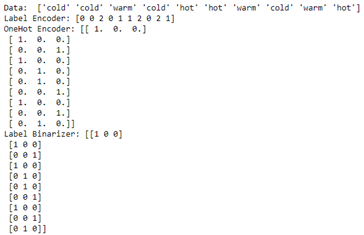


Scikitlearn suggests using OneHotEncoder for X matrix i.e. the features you feed in a model, and to use a LabelBinarizer for the y labels.

In [ ]:
# binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

Now, we will split our dataset into train set and test set..

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(train_images, test_images, train_labels, test_labels) = train_test_split(data,
	labels, test_size=0.2, random_state=42)

### Create the network

Now we are ready to define our convolutional neural network.

In this case, we experiment with a 20 nodes Dense layer just before the final layer.

Type the following block of code in the next code block to create the network.

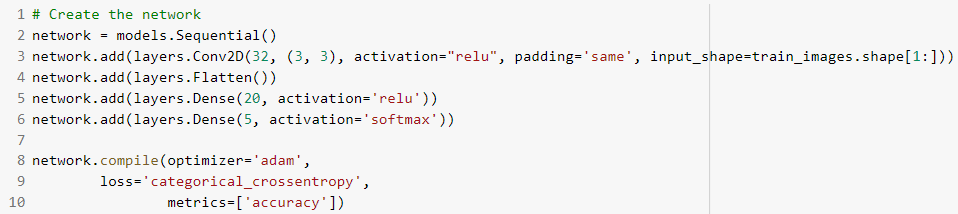

In [ ]:
#
#[ENTER YOUR CODE HERE]
#

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1605632)           0         
_________________________________________________________________
dense (Dense)                (None, 5)                 8028165   
Total params: 8,029,061
Trainable params: 8,029,061
Non-trainable params: 0
_________________________________________________________________


### Train the network
We can now proceed to train the model with our training dataset and evaluate with our test dataset to get a feel of the accuracy

Type the following block of code in the next code block to create the network.

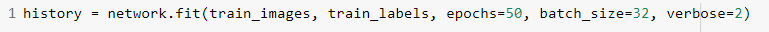

In [ ]:
#
#[ENTER YOUR CODE HERE]
#

### Evaluate the network
After training, we can call the evaluate() function to have a feel of how our model perform.  Results may differ due to the stochastic nature of weight initialisation

Type the following block of code in the next code block to create the network.

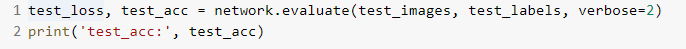

In [ ]:
#
#[ENTER YOUR CODE HERE]
#

### Exercise


Can adding more convolution layers to improve the accuracy?  <br>How about adding more filters, changing kernel size, epochs, and other setting?

In [ ]:
#
#[ENTER YOUR CODE HERE]
#